In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
histogram_100 = np.load("../data/rcsb/histogram_100_not_normed.npy", allow_pickle=True)
alpha_100 = np.load("../data/alphafold/histogram_100_not_normed.npy", allow_pickle=True)
simulation_100 = np.load("../data/simulations/3d/histogram_100_not_normed.npy", allow_pickle=True)
distances = np.linspace(1, 300, 300)[:-1]

In [38]:
mean_100 = np.mean(histogram_100, axis=0)
normed_mean_100 = mean_100 / np.sum(mean_100)

alpha_mean_100 = np.mean(alpha_100, axis=0)
normed_alpha_mean_100 = alpha_mean_100 / np.sum(alpha_mean_100)

alpha_median_100 = np.median(alpha_100, axis=0)
normed_alpha_median_100 = alpha_median_100 / np.sum(alpha_median_100)

median_100 = np.median(histogram_100, axis=0)
normed_median_100 = median_100 / np.sum(median_100)

sim_mean_100 = np.mean(simulation_100, axis=0)
normed_sim_mean_100 = sim_mean_100 / np.sum(sim_mean_100)

sim_median_100 = np.median(simulation_100, axis=0)
normed_sim_median_100 = sim_median_100 / np.sum(sim_median_100)

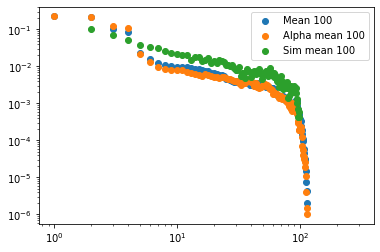

In [39]:
plt.scatter(distances, normed_mean_100, label="Mean 100")
plt.scatter(distances, normed_alpha_mean_100, label="Alpha mean 100")
plt.scatter(distances, normed_sim_mean_100, label="Sim mean 100")
plt.loglog()
plt.legend()

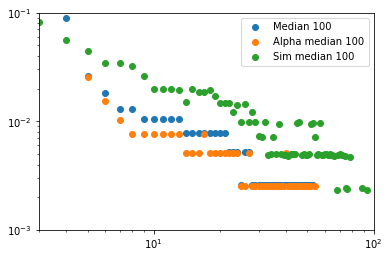

In [41]:
plt.scatter(distances, normed_median_100, label="Median 100")
plt.scatter(distances, normed_alpha_median_100, label="Alpha median 100")
plt.scatter(distances, normed_sim_median_100, label="Sim median 100")
plt.loglog()
plt.ylim(0.001, 0.1)
plt.xlim(3, 100)
plt.legend()

In [52]:
histogram_200 = np.load("../data/rcsb/histogram_200_not_normed.npy", allow_pickle=True)
alpha_200 = np.load("../data/alphafold/histogram_200_not_normed.npy", allow_pickle=True)
simulation_200 = np.load("../data/simulations/3d/histogram_200_not_normed.npy", allow_pickle=True)
distances = np.linspace(1, 300, 300)[:-1]

FileNotFoundError: [Errno 2] No such file or directory: '../data/rcsb/histogram_200_not_normed.npy'

In [45]:
alpha_100 = np.load("../data/alphafold/histogram_100_not_normed.npy", allow_pickle=True)
alpha_200 = np.load("../data/alphafold/histogram_200_not_normed.npy", allow_pickle=True)
alpha_300 = np.load("../data/alphafold/histogram_300_not_normed.npy", allow_pickle=True)
distances = np.linspace(1, 300, 300)[:-1]



In [46]:
alpha_mean_100 = np.mean(alpha_100, axis=0)
normed_alpha_mean_100 = alpha_mean_100 / np.sum(alpha_mean_100)

alpha_median_100 = np.median(alpha_100, axis=0)
normed_alpha_median_100 = alpha_median_100 / np.sum(alpha_median_100)

alpha_mean_200 = np.mean(alpha_200, axis=0)
normed_alpha_mean_200 = alpha_mean_200 / np.sum(alpha_mean_200)

alpha_median_200 = np.median(alpha_200, axis=0)
normed_alpha_median_200 = alpha_median_200 / np.sum(alpha_median_200)

alpha_mean_300 = np.mean(alpha_300, axis=0)
normed_alpha_mean_300 = alpha_mean_300 / np.sum(alpha_mean_300)

alpha_median_300 = np.median(alpha_300, axis=0)
normed_alpha_median_300 = alpha_median_300 / np.sum(alpha_median_300)



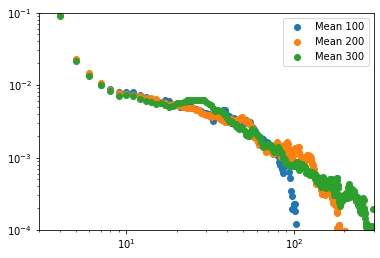

In [50]:
plt.scatter(distances, normed_alpha_mean_100, label="Mean 100")
plt.scatter(distances, normed_alpha_mean_200, label="Mean 200")
plt.scatter(distances, normed_alpha_mean_300, label="Mean 300")
plt.ylim(0.0001, 0.1)
plt.xlim(3, 300)
plt.loglog()
plt.legend()

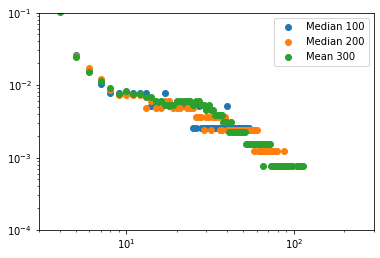

In [51]:
plt.scatter(distances, normed_alpha_median_100, label="Median 100")
plt.scatter(distances, normed_alpha_median_200, label="Median 200")
plt.scatter(distances, normed_alpha_median_300, label="Mean 300")
plt.loglog()
plt.ylim(0.0001, 0.1)
plt.xlim(3, 300)
plt.legend()